<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/Analysing_DataSet/AnalysingDataSet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Çizgi Grafiği
Daha zor problemlerde kullanılır. Zamana bağlı deişkenlerin olduğu veri setlerinde  ve iot gibi makinelerin yönettiği verileri görselleştirmek için kullanabileceimiz bir veri görselleştirme tekniğidir. 

In [1]:
 import pandas as pd
 import seaborn as sns
 fmri = sns.load_dataset("fmri")
 df = fmri.copy()
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


Beyne bağlanan bir cihaz ile toplanan sinyallerin oluşturduğu veri seti.
* Subecjt: kişiler. 
* timepoint: zaman noktalrı
* event: verinin toplanma şekli
* region: sinyalin toplandığı bölge

In [2]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [3]:
df.region.value_counts()

parietal    532
frontal     532
Name: region, dtype: int64

In [4]:
df.event.value_counts()

stim    532
cue     532
Name: event, dtype: int64

In [5]:
# time pointlere göre sinyalleri gözlemleyelim. 
df["timepoint"].value_counts()

18    56
10    56
4     56
5     56
6     56
2     56
8     56
7     56
3     56
11    56
14    56
12    56
13    56
0     56
15    56
16    56
9     56
17    56
1     56
Name: timepoint, dtype: int64

In [6]:
df["timepoint"].value_counts()

18    56
10    56
4     56
5     56
6     56
2     56
8     56
7     56
3     56
11    56
14    56
12    56
13    56
0     56
15    56
16    56
9     56
17    56
1     56
Name: timepoint, dtype: int64

In [9]:
# her bir zaman noktasında aynı sinyal mi var?
df.groupby("timepoint")["signal"].count() # timea göre signalleri inceliyoruz

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [10]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


##Çicli Grafiğinin (Line Plot) Oluşturulması ve Çaprazlamalar

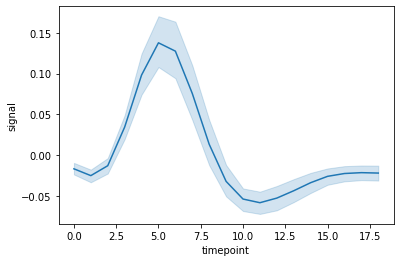

In [11]:
sns.lineplot(x = "timepoint", y = "signal", data = df)

Bu grafiğe tek başına bakmak yetmez, kırılımlarını da incelemek gerekir.

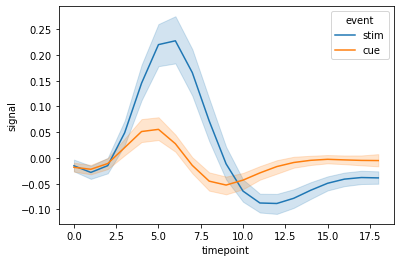

In [13]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df)

stim sınıfı aslında bir üstteki grafiğin oluşumunda etki etmiş. Bu anlamı çıkarabiliriz.

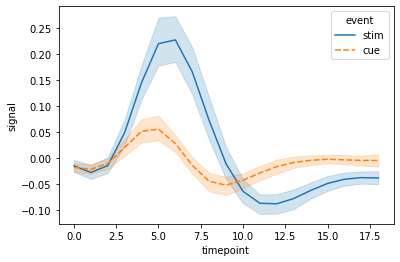

In [14]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df, style ="event")

Çizgiler, ortalamalardır; etrafındaki bulutsu renkler ise standart sapmalar.

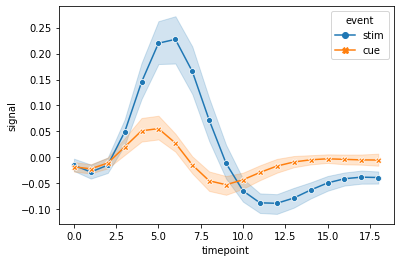

In [17]:
# ortalamaları göstren çizgileri belirginleştirelin.
(sns.lineplot(
    x = "timepoint", 
    y = "signal", 
    hue = "event", 
    data = df,
    style = "event",
    markers = True,
    dashes = False 
    )
)

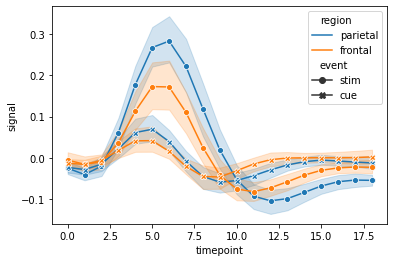

In [18]:
(sns.lineplot(
    x = "timepoint", 
    y = "signal", 
    hue = "region", 
    data = df,
    style = "event",
    markers = True,
    dashes = False 
    )
)